In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

/Users/alex/miniconda3/envs/cfe/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


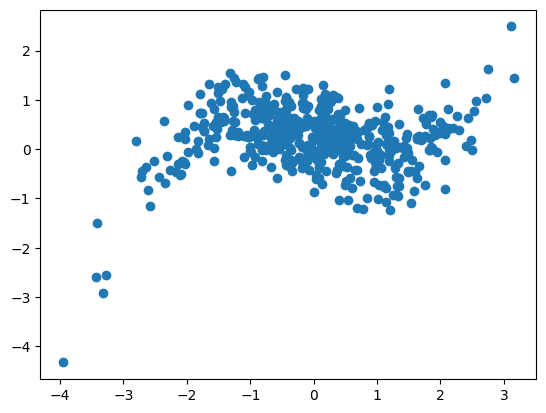

In [2]:
rng = np.random.default_rng(seed = 123)
n = 500
effect = 0.5
t_proportion = 0.5
x = rng.normal(scale = 1.2, size = (n,))
t = rng.binomial(n=1, p=t_proportion, size=(n,))
xt = 10*(x**2/20-0.2)*(x/5)
y = effect*t + xt + rng.normal(scale = 0.4, size=(n,))
plt.scatter(x, y)

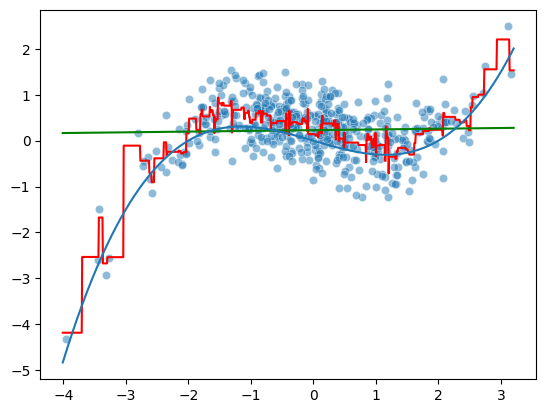

In [9]:
data = pd.DataFrame(
    {"x" : x,
    "t": t,
    "y" : y}
)
g = GradientBoostingRegressor().fit(x.reshape(-1,1), y)
reg = LinearRegression().fit(x.reshape(-1,1), y)

xgrid = np.linspace(
    start = np.min(data['x'])-0.05,
    stop = np.max(data['x']+0.05),
    num=1000).reshape(-1,1)

gpreds = g.predict(xgrid)
rpreds = reg.predict(xgrid)

sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(xgrid, gpreds, color='red')
plt.plot(xgrid, rpreds, color='green')
plt.plot(xgrid, 10*(xgrid**2/20-0.2)*(xgrid/5))

In [68]:
data = pd.DataFrame(
    {"x" : x,
    "t": t,
    "y" : y}
)
reg = smf.ols(
    "y ~ t + x + t:x",
    data = data
).fit()
reg.get_robustcov_results('HC2').summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
No. Observations:                 500   F-statistic:                     29.58
Covariance Type:                  HC2   Prob (F-statistic):           1.31e-17
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0110      0.041     -0.272      0.786      -0.091       0.069
t              0.4766      0.052      9.224      0.000       0.375       0.578
x              0.0414      0.065      0.634      0.526      -0.087       0.170
t:x           -0.0926      0.079     -1.174      0.241      -0.247       0.062
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""